**Problem Statement**

The data scientists at Big Mart have collected sales data for one thousand five hundred and fifty-nine products across ten stores in different cities. Furthermore, certain attributes of each product and store have been defined. The aim is to build a predictive model and find the sales figures of each product at a particular store.

Let's now try and understand what could affect the target variable "Sales"

1.Time of the week.

2.Time of the day.

3.Time of the year.

4.Store size and location.

5.The item in question.

In [405]:
#Import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #for labelling and linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

In [406]:
#Load the train and test dataset in pandas DataFrame
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [407]:
#Check no. of rows and colums in train dataset
train.shape

(8523, 12)

In [408]:
test.shape #***

(5681, 11)

In [409]:
#Print the no. of columns in train dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [410]:
#Check the no. of rows and columns in test dataset
test.shape

(5681, 11)

In [411]:
#print the columns of the test dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [412]:
#Combine test and train into one file to perform EDA operations on both datasets
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train, test], ignore_index = True) #here both the datasets will combine.
print(data.shape)# checks the no of columns present in the dataframe

(14204, 13)


In [413]:
#return the top 5 rows of the data frame
data.head()#  This will also help to check the no. of columns present in the dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


Note : The item_outlet_sales is the target variable.

In [414]:
#Describe function for numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [415]:
# To check the missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Item_Weight has 2439 missing values.

Outlet_Size has 4016 missing values.

Item_Outlet_Sales has 5681 missing values.

We can predict these missing values using the model.


In [416]:
#Print the unique values in the Item_Fat_Content, where there are only two unique types of fat content in items: Low Fat and Regular.
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [417]:
#printing the unique values in the Outlet_Establishment_Year column, where the data ranges from 1985 to 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [418]:
# we can also calculate the Outlet_Age
data["Outlet_Age"] = 2018 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [419]:
#Unique values in Outlet_Size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

**Note: There are also missing values in this column.**

In [420]:
#Printing the count values of Outlet_Size
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

We can see that low Fat products are the most abundant.

In [421]:
#Print the count value of Outlet_Size

data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

We can see that the majority of outlets are medium and small-scale outlets.

In [422]:
#Use the mode fun. to find the most common value in Outlet_Size
data["Outlet_Size"].mode()[0]

'Medium'

*Output shows that "Medium" is the most commonly occuring value.*

In [423]:
#Two variables with missing values - Item_Weight and Outlet_Size
#Replacing missing values in Outlet_Size with the value "medium"
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [424]:
#Replacing missing values in Item_Weight with the mean weight
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

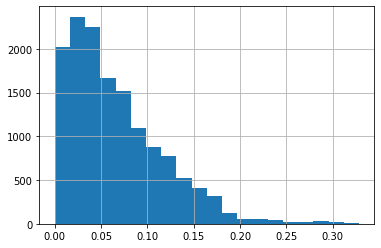

In [425]:
#Plot a histogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins=20)

In [426]:
#Detecting outliers:
#An outlier is a data point that lies outside the overall pattern in a distribution.
#A commonly used rule states that a data point is an outlier if it is more than 1.5*IQR above the third quartile or below the first quartile.
#Using this , one can remove the outliers and output the resulting data in fill_data variable.
#Calculate the first quantile for Item_Visibility
Q1 = data["Item_Visibility"].quantile(0.25)

In [427]:
#Calculating second quantile
Q3 = data["Item_Visibility"].quantile(0.75)

In [428]:
#Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [429]:
#Now that the IQR range is known, remove the outliers from the data
#The resulting data is stored in fill_data variable
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [430]:
#Display the data
fill_data.head(2)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [431]:
#Now check the shape of the resulting dataset without the outliers
fill_data.shape

(13943, 14)

In [432]:
#Shape of the original dataset is 14204 rows and 14 coulumns with outliers
data.shape

(14204, 14)

In [433]:
#Assign fill_data dataset to DataFrame
data = fill_data

In [434]:
#Modify Item_Visibility by converting the numerical values into the categories Low Visibility, visibility, and High Visibility
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])

In [435]:
#Print the count of Item_Visibility_bins i,e replacing null values with low visibility
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [436]:
#Now again replacwe null values with low visibility
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex=True)

In [437]:
#We found types and diferences in representation in categories of Item_Fat_Content variable.
#This can be corrected using the code on screen

#Replace all other representations of Low Fat with Low Fat
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat","LF"], "Low Fat")

In [438]:
#Replace all representations of reg with Regular
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace("reg", "Regular")

In [439]:
#Print unique fat count values
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [440]:
#Code all categorical variables as numeric using 'LabelEncoder' from sklearn's preprocessing module
#Iniializing the label encoder
le = LabelEncoder()

In [441]:
#Transform Item_Fat_Content
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [442]:
#Transform Item_Visibility_bins
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])


In [443]:
#Transform Outlet_Location_Type
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])

In [444]:
#Print the umique values of Outlet_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [445]:
#Create dummies for Outlet_Type
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [446]:
#Explore the clumn Item_Identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [447]:
#As there are mltiple values of food, nonconsumable items, and drinks with different numbers, combine the item type
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [448]:
#As multiple categories are present in Item_Identifier, reduce this by mapping
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({'FD': 'Food',
                                                             'NC': 'Non-Consumable',
                                                             'DR': 'Drinks'})

In [449]:
#Only three categories are present in an Item_Type_Combined column.
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [450]:
data.shape

(13943, 16)

In [451]:
#Perform one-hot encoding for all columns as the model works on numerical values and not on categorical values
data = pd.get_dummies(data, columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type_Combined"])

In [452]:
data.dtypes
#Here in output we can see some columns are categorical which are mentioned as objects

Item_Identifier                        object
Item_Weight                           float64
Item_Visibility                       float64
Item_Type                              object
Item_MRP                              float64
Outlet_Identifier                      object
Outlet_Establishment_Year               int64
Item_Outlet_Sales                     float64
source                                 object
Outlet_Age                              int64
Item_Visibility_bins                 category
Item_Fat_Content_0                      uint8
Item_Fat_Content_1                      uint8
Outlet_Location_Type_0                  uint8
Outlet_Location_Type_1                  uint8
Outlet_Location_Type_2                  uint8
Outlet_Size_0                           uint8
Outlet_Size_1                           uint8
Outlet_Size_2                           uint8
Outlet_Type_Grocery Store               uint8
Outlet_Type_Supermarket Type1           uint8
Outlet_Type_Supermarket Type2     

In [453]:
import warnings
warnings.filterwarnings('ignore')

#Drop the columns which have been converted to different types
data.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)

#Divide the dataset created earlier into train and test dtasets
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

#Drop unnecessary columns
test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)
train.drop(["source"], axis=1, inplace=True)

#Export modified versions of the files
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

In [454]:
#Read the train_modified.csv and test_modified.csv dataset|
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [455]:
#Print the data types of train2 column
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                  object
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [456]:
#Drop the irrelevant variables from train2 dataset
#Create the independent variable X_train and dependent variable y_train
X_train = train2.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"], axis=1)
y_train = train2.Item_Outlet_Sales

In [457]:
#Drop those  irrelevant variables from test2 dataset
X_test = test2.drop(["Outlet_Identifier", "Item_Identifier"], axis=1)

In [458]:
X_test#columns present in the test dataset

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,19,Low Viz,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,Low Viz,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,Viz,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,Low Viz,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,Viz,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,21,Low Viz,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,9,High Viz,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,16,Viz,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,11,NaN,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [459]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,19,Low Viz,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,Low Viz,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [460]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [461]:
#Now ist import sklearn libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [462]:
#Create a train and test split
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [463]:
#Fit Linear Regression to the training dataset
lin = LinearRegression()

In [464]:
LinearRegression

sklearn.linear_model._base.LinearRegression